<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\stft"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'STFT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'STFT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'STFT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [3]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [4]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [5]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """
    
    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [7]:
import torch
import torch.nn as nn

class CustomCnn(nn.Module):
    def __init__(self, debug_mode_flag=False):
        super().__init__()
        self.debug_mode_flag = debug_mode_flag
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces spatial size
        )
        
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Further reduces spatial size
        )

        # Global Average Pooling to reduce spatial dimensions 
        self.global_avg_pool = nn.AdaptiveAvgPool2d((8, 8))  # Keeps a manageable seq_len
        self.flatten = nn.Flatten(start_dim=2)  # Keeps batch & channel dims

    def forward(self, x):
        if self.debug_mode_flag: print(f"Input shape: {x.shape}")
        
        x = self.block_1(x)
        if self.debug_mode_flag: print(f"Block 1 shape: {x.shape}")
        
        x = self.block_2(x)
        if self.debug_mode_flag: print(f"Block 2 shape: {x.shape}")
        
        x = self.global_avg_pool(x)  # (batch, 128, 8, 8)
        if self.debug_mode_flag: print(f"Global Avg Pool shape: {x.shape}")

        # x = self.flatten(x)  # (batch, 128, 64)
        # if self.debug_mode_flag: print(f"Flattened shape (Transformer Input): {x.shape}")
        
        return x

    
class TransformerEncoder(nn.Module):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.att = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.layernorm2 = nn.LayerNorm(embed_dim)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)

    def forward(self, x):
        attn_output, _ = self.att(x, x, x)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

debug_mode_flag = False
class TRANS_CNN(nn.Module):
    def __init__(self, input_shape, num_classes, embed_dim=512, num_heads=2, ff_dim=64, num_transformer_blocks=4):
        
        super(TRANS_CNN,self).__init__()
        
        self.num_transformer_blocks = num_transformer_blocks
        self.cnn_extractor = CustomCnn()
        
        self.projection = nn.Linear(512, embed_dim)
        
        self.encoder = nn.ModuleList([
            TransformerEncoder(embed_dim,num_heads,ff_dim) for _ in range(num_transformer_blocks)
        ])
        
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(0.1)
        
        self.precls = nn.Linear(embed_dim,embed_dim)
        self.precls2 = nn.Linear(embed_dim,embed_dim)
        self.precls3 = nn.Linear(embed_dim,embed_dim//4)
        
        self.clf = nn.Linear(embed_dim//4,num_classes)
        
        
    def forward(self,x):
        
        x = self.cnn_extractor(x)
        if debug_mode_flag: print(f"x shape after cnn extraction = {x.shape}")
        
        B,C,H,W = x.shape
        
        x = x.view(B,H*W,C)
        if debug_mode_flag: print(f"x shape after changing view= {x.shape}")
        
        # x = self.projection(x)
        # if debug_mode_flag: print(f"x shape after projection= {x.shape}")
        
        for encoderblock in self.encoder:
            x = encoderblock(x)
            
        if debug_mode_flag: print(f"x shape after passing thru encoder= {x.shape}")
        
        x = x.permute(1,0,2)
        if debug_mode_flag: print(f"x shape after permuting{x.shape}")
        
        x = self.precls3(x)
        if debug_mode_flag: print(f"precls3 {x.shape}")
        
        x = self.dropout(x)
        
        x = x.mean(dim=0)  # Global average pooling over sequence (9 tokens → 1 token)
        if debug_mode_flag: print(f"x shape after average pooling {x.shape}")

        x = self.clf(x)  #they see me rolling
        if debug_mode_flag: print(f"cls {x.shape}")
        
        
        return x

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [8]:
model  = TRANS_CNN(input_shape=(3,224,224),num_classes=2,num_transformer_blocks=4,embed_dim=128) # declare model here
randomdata = torch.randn((1,3,224,224))
output = model(randomdata)
output.shape

torch.Size([1, 2])

In [9]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
TRANS_CNN                                                    --
├─CustomCnn: 1-1                                             --
│    └─Sequential: 2-1                                       --
│    │    └─Conv2d: 3-1                                      448
│    │    └─BatchNorm2d: 3-2                                 32
│    │    └─ReLU: 3-3                                        --
│    │    └─Conv2d: 3-4                                      4,640
│    │    └─BatchNorm2d: 3-5                                 64
│    │    └─ReLU: 3-6                                        --
│    │    └─MaxPool2d: 3-7                                   --
│    └─Sequential: 2-2                                       --
│    │    └─Conv2d: 3-8                                      18,496
│    │    └─BatchNorm2d: 3-9                                 128
│    │    └─ReLU: 3-10                                       --
│    │    └─Conv2d: 3-11  

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc




__________________________________________________
__________________________________________________
__________________________________________________
params set: 1
__________________________________________________
__________________________________________________
__________________________________________________
Running with params: {'num_heads': 32, 'num_transformer_blocks': 8, 'learning_rate': 0.0014268683384269449, 'weight_decay': 0.0003463319958859285, 'label_smoothing': 0.18}
__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 1
Epoch [1/100], Loss: 0.7188, Accuracy: 0.4991
Validation Loss: 0.7154, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6952, Accuracy: 0.5201
Validation Loss: 0.6670, Validation Accuracy: 0.6800
Epoch [3/100], Loss: 0.6939, Accuracy: 0.5103
Validation Loss: 0.6695, Validation Accuracy: 0.5000
Epoch [4/100], Loss: 0.6417, Accuracy: 0.6911
V

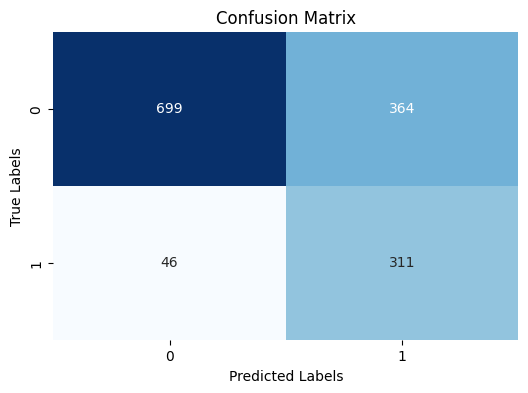


Class-wise Accuracy:
Class 0: 699/1063 (65.76%)
Class 1: 311/357 (87.11%)

Precision-Recall Curve:


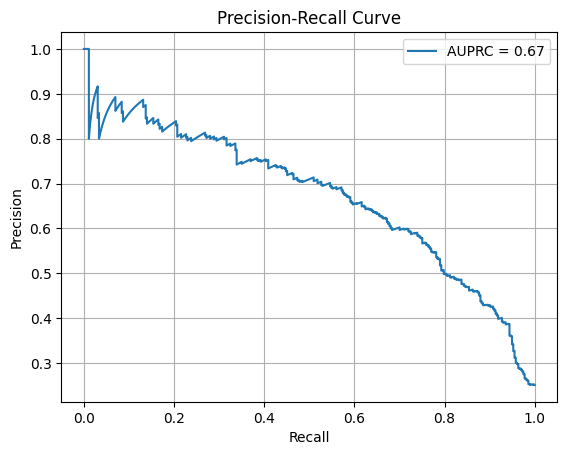


ROC Curve:


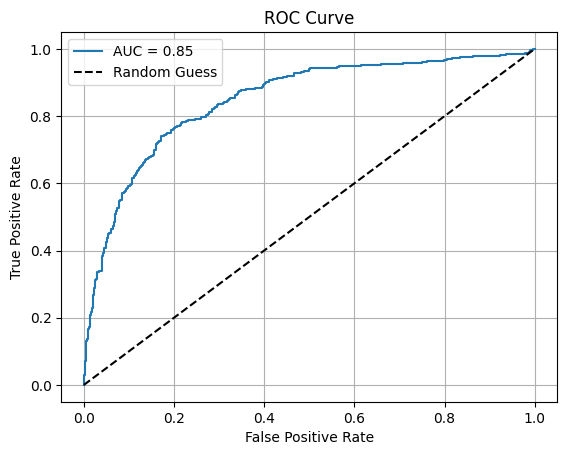


Mean F1 Score: 0.6880
Balanced Accuracy: 0.7644
Average AUPRC: 0.6717

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.77      1063
           1       0.46      0.87      0.60       357

    accuracy                           0.71      1420
   macro avg       0.70      0.76      0.69      1420
weighted avg       0.82      0.71      0.73      1420

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 2
Epoch [1/100], Loss: 0.7111, Accuracy: 0.5005
Validation Loss: 0.6457, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6634, Accuracy: 0.6171
Validation Loss: 0.7071, Validation Accuracy: 0.6022
Epoch [3/100], Loss: 0.6043, Accuracy: 0.7653
Validation Loss: 0.6385, Validation Accuracy: 0.7711
Epoch [4/100], Loss: 0.6025, Accuracy: 0.7706
Validation Loss: 0.6222, Validation Accuracy: 0.7748
Epoch [5/100], Los

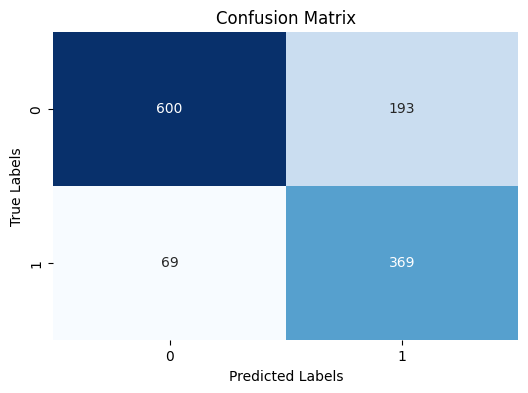


Class-wise Accuracy:
Class 0: 600/793 (75.66%)
Class 1: 369/438 (84.25%)

Precision-Recall Curve:


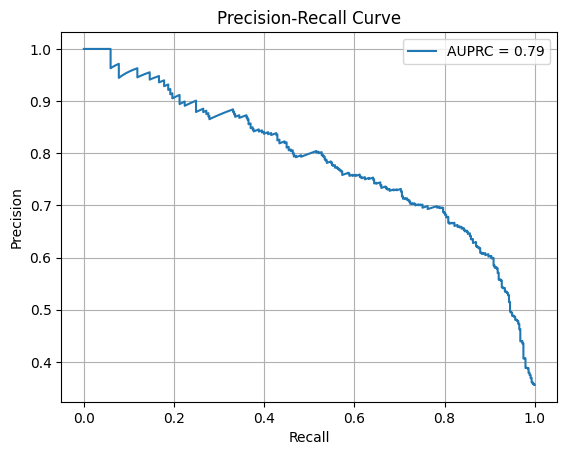


ROC Curve:


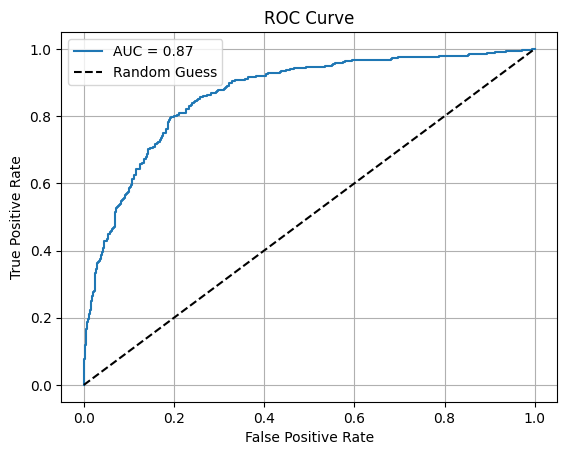


Mean F1 Score: 0.7794
Balanced Accuracy: 0.7995
Average AUPRC: 0.7850

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       793
           1       0.66      0.84      0.74       438

    accuracy                           0.79      1231
   macro avg       0.78      0.80      0.78      1231
weighted avg       0.81      0.79      0.79      1231

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 3
Epoch [1/100], Loss: 0.7123, Accuracy: 0.4979
Validation Loss: 0.6934, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6955, Accuracy: 0.5057
Validation Loss: 0.6893, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.6306, Accuracy: 0.6890
Validation Loss: 0.6359, Validation Accuracy: 0.7319
Epoch [4/100], Loss: 0.5931, Accuracy: 0.7801
Validation Loss: 0.5888, Validation Accuracy: 0.7633
Epoch [5/100], Los

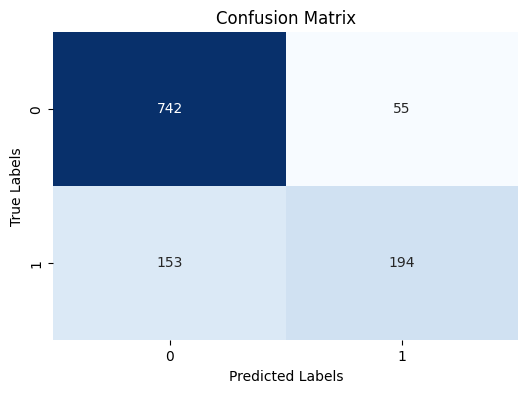


Class-wise Accuracy:
Class 0: 742/797 (93.10%)
Class 1: 194/347 (55.91%)

Precision-Recall Curve:


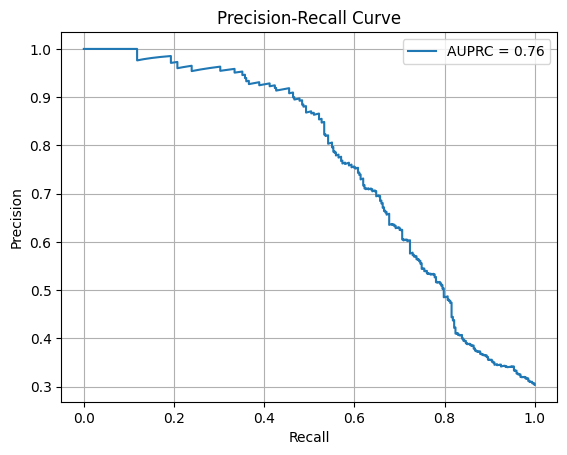


ROC Curve:


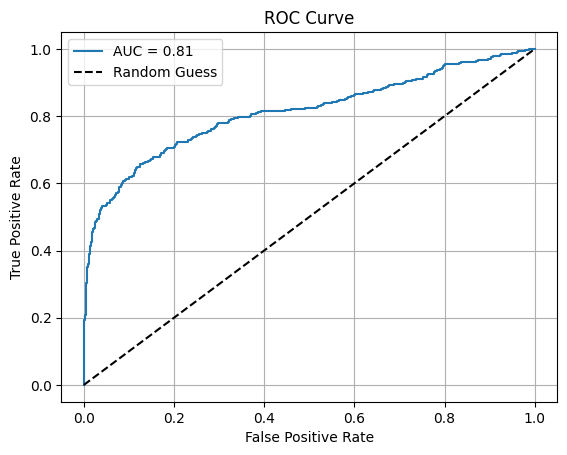


Mean F1 Score: 0.7640
Balanced Accuracy: 0.7450
Average AUPRC: 0.7585

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       797
           1       0.78      0.56      0.65       347

    accuracy                           0.82      1144
   macro avg       0.80      0.75      0.76      1144
weighted avg       0.81      0.82      0.81      1144

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 4
Epoch [1/100], Loss: 0.7057, Accuracy: 0.5009
Validation Loss: 0.7113, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6138, Accuracy: 0.7430
Validation Loss: 0.6647, Validation Accuracy: 0.7528
Epoch [3/100], Loss: 0.5796, Accuracy: 0.8059
Validation Loss: 0.5946, Validation Accuracy: 0.7567
Epoch [4/100], Loss: 0.5729, Accuracy: 0.8147
Validation Loss: 0.5841, Validation Accuracy: 0.7890
Epoch [5/100], Los

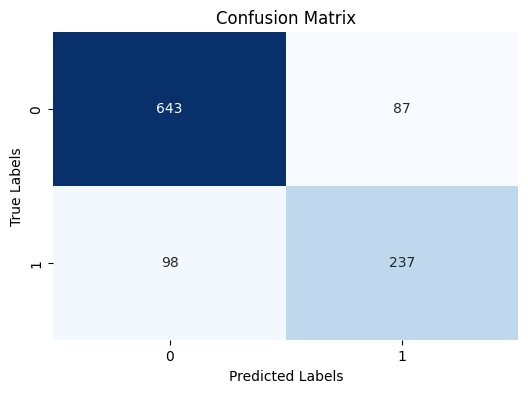


Class-wise Accuracy:
Class 0: 643/730 (88.08%)
Class 1: 237/335 (70.75%)

Precision-Recall Curve:


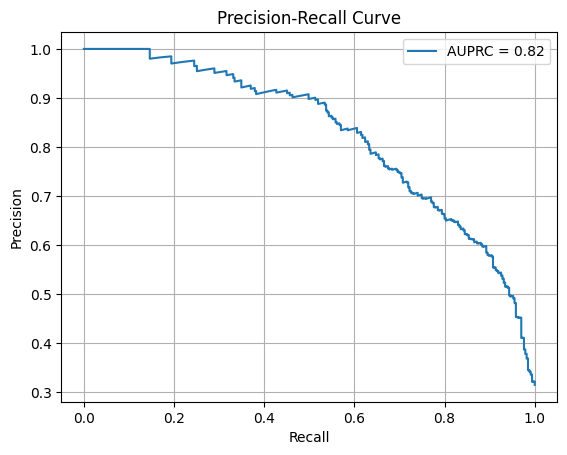


ROC Curve:


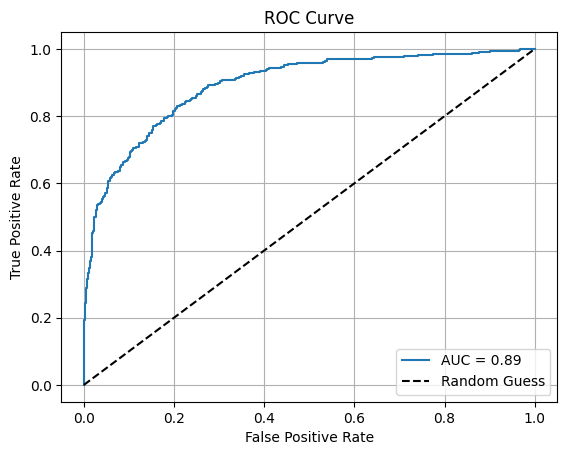


Mean F1 Score: 0.7968
Balanced Accuracy: 0.7941
Average AUPRC: 0.8239

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       730
           1       0.73      0.71      0.72       335

    accuracy                           0.83      1065
   macro avg       0.80      0.79      0.80      1065
weighted avg       0.82      0.83      0.83      1065

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 5
Epoch [1/100], Loss: 0.7086, Accuracy: 0.4698
Validation Loss: 0.6728, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6913, Accuracy: 0.5127
Validation Loss: 0.6747, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.6314, Accuracy: 0.7137
Validation Loss: 0.6267, Validation Accuracy: 0.7671
Epoch [4/100], Loss: 0.5993, Accuracy: 0.7850
Validation Loss: 0.6549, Validation Accuracy: 0.7472
Epoch [5/100], Los

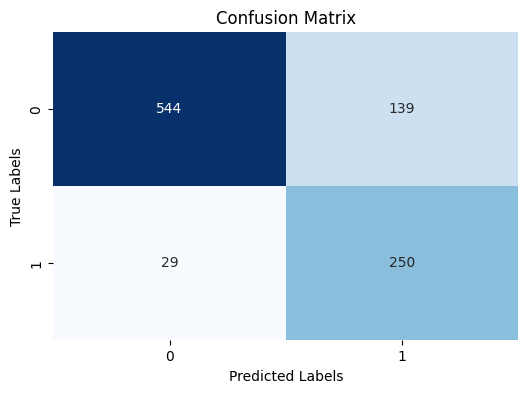


Class-wise Accuracy:
Class 0: 544/683 (79.65%)
Class 1: 250/279 (89.61%)

Precision-Recall Curve:


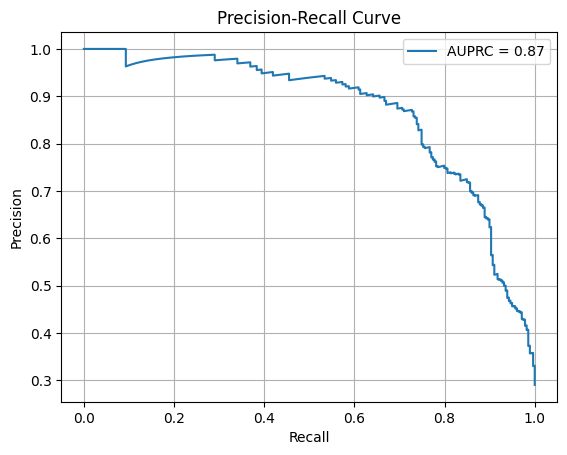


ROC Curve:


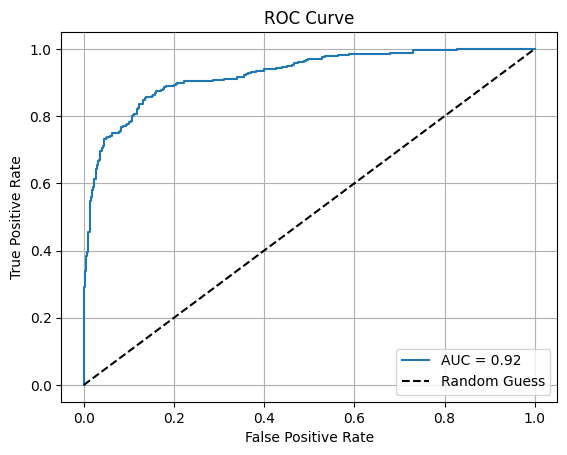


Mean F1 Score: 0.8074
Balanced Accuracy: 0.8463
Average AUPRC: 0.8686

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       683
           1       0.64      0.90      0.75       279

    accuracy                           0.83       962
   macro avg       0.80      0.85      0.81       962
weighted avg       0.86      0.83      0.83       962

Accuracy for each fold: [np.float64(0.764360683125555), np.float64(0.7995430910881169), np.float64(0.7450345134311305), np.float64(0.7941423021876917), np.float64(0.8462717192231196)]
AUPRC for each fold: [np.float64(0.6716991719215247), np.float64(0.7850042367785199), np.float64(0.7584752271496277), np.float64(0.8239442238988377), np.float64(0.8686049076359007)]
Average AUPRC across all folds: 0.7815455534768821
Average Balanced Accuracy across all folds: 0.7898704618111227
Results saved to D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\newnotebooks\results.csv
______

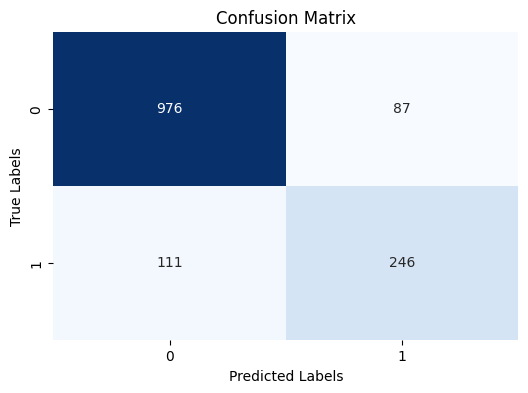


Class-wise Accuracy:
Class 0: 976/1063 (91.82%)
Class 1: 246/357 (68.91%)

Precision-Recall Curve:


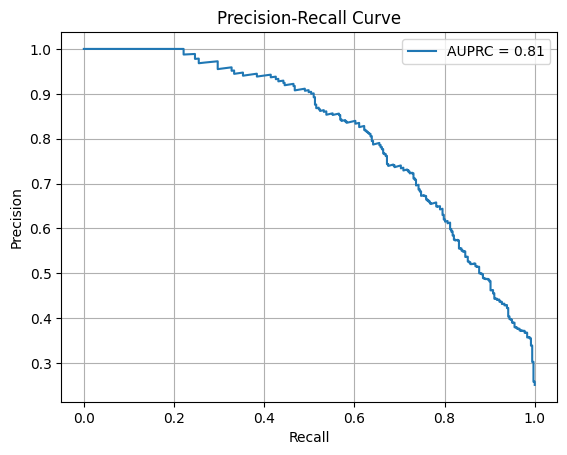


ROC Curve:


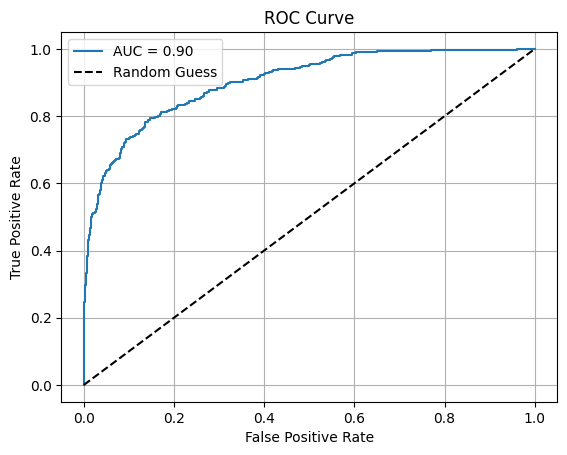


Mean F1 Score: 0.8105
Balanced Accuracy: 0.8036
Average AUPRC: 0.8122

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1063
           1       0.74      0.69      0.71       357

    accuracy                           0.86      1420
   macro avg       0.82      0.80      0.81      1420
weighted avg       0.86      0.86      0.86      1420

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 2
Epoch [1/100], Loss: 0.7014, Accuracy: 0.5411
Validation Loss: 0.6425, Validation Accuracy: 0.5200
Epoch [2/100], Loss: 0.6047, Accuracy: 0.7664
Validation Loss: 0.6093, Validation Accuracy: 0.7355
Epoch [3/100], Loss: 0.5924, Accuracy: 0.7908
Validation Loss: 0.6105, Validation Accuracy: 0.7665
Epoch [4/100], Loss: 0.5804, Accuracy: 0.7992
Validation Loss: 0.6111, Validation Accuracy: 0.7634
Epoch [5/100], Los

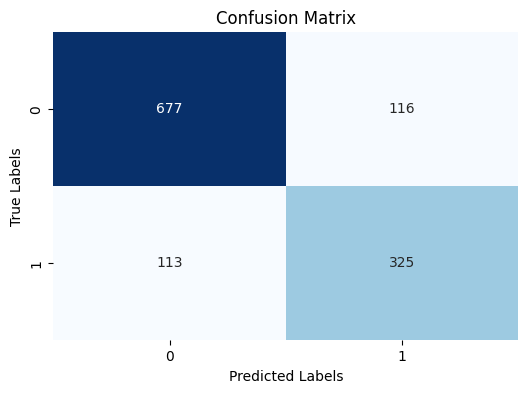


Class-wise Accuracy:
Class 0: 677/793 (85.37%)
Class 1: 325/438 (74.20%)

Precision-Recall Curve:


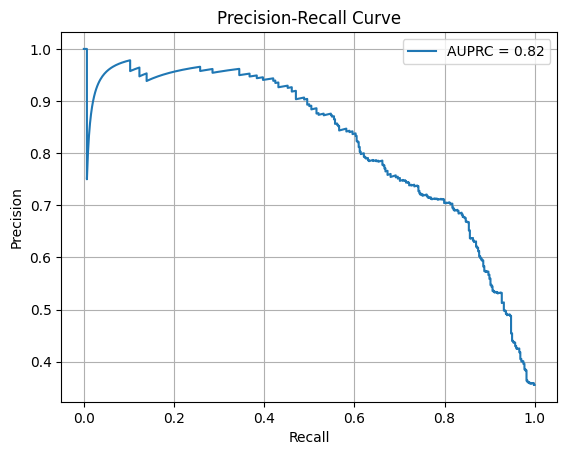


ROC Curve:


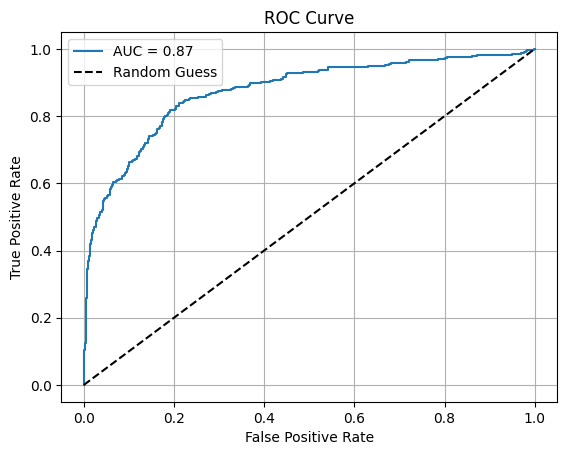


Mean F1 Score: 0.7974
Balanced Accuracy: 0.7979
Average AUPRC: 0.8213

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       793
           1       0.74      0.74      0.74       438

    accuracy                           0.81      1231
   macro avg       0.80      0.80      0.80      1231
weighted avg       0.81      0.81      0.81      1231

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 3
Epoch [1/100], Loss: 0.7107, Accuracy: 0.5283
Validation Loss: 0.7309, Validation Accuracy: 0.5477
Epoch [2/100], Loss: 0.6608, Accuracy: 0.6380
Validation Loss: 0.5950, Validation Accuracy: 0.7778
Epoch [3/100], Loss: 0.5957, Accuracy: 0.7775
Validation Loss: 0.5953, Validation Accuracy: 0.7836
Epoch [4/100], Loss: 0.5883, Accuracy: 0.7889
Validation Loss: 0.6562, Validation Accuracy: 0.7510
Epoch [5/100], Los

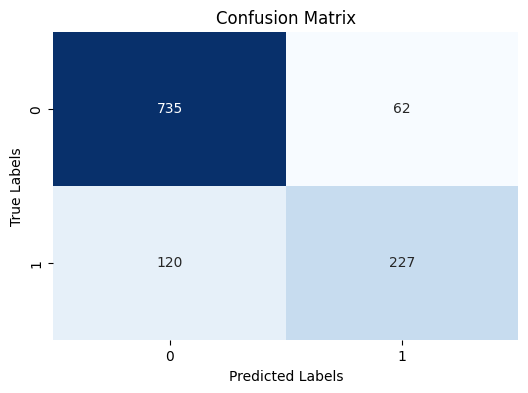


Class-wise Accuracy:
Class 0: 735/797 (92.22%)
Class 1: 227/347 (65.42%)

Precision-Recall Curve:


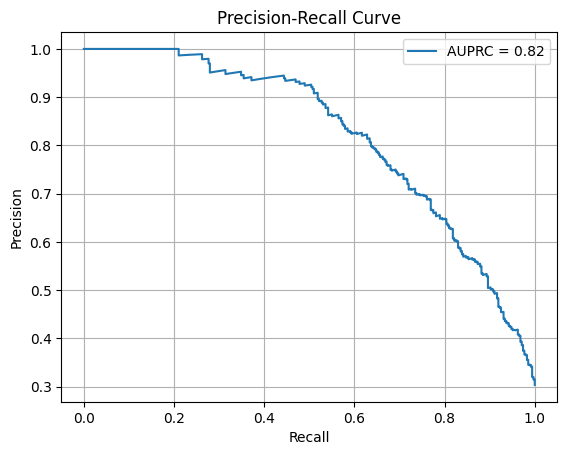


ROC Curve:


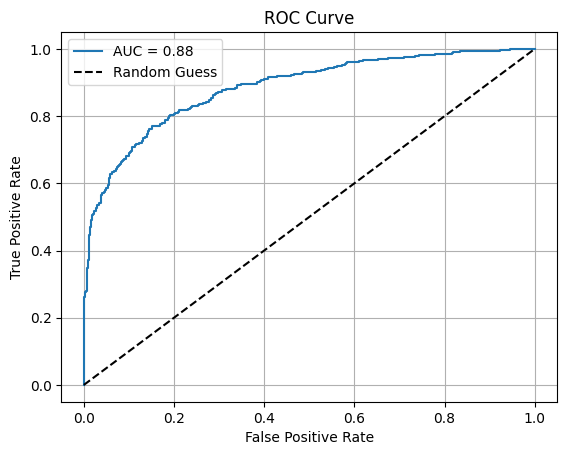


Mean F1 Score: 0.8018
Balanced Accuracy: 0.7882
Average AUPRC: 0.8207

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       797
           1       0.79      0.65      0.71       347

    accuracy                           0.84      1144
   macro avg       0.82      0.79      0.80      1144
weighted avg       0.84      0.84      0.84      1144

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 4
Epoch [1/100], Loss: 0.7132, Accuracy: 0.4846
Validation Loss: 0.6757, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6462, Accuracy: 0.6797
Validation Loss: 0.6271, Validation Accuracy: 0.7551
Epoch [3/100], Loss: 0.5878, Accuracy: 0.7914
Validation Loss: 0.6047, Validation Accuracy: 0.7640
Epoch [4/100], Loss: 0.5727, Accuracy: 0.8115
Validation Loss: 0.5913, Validation Accuracy: 0.7906
Epoch [5/100], Los

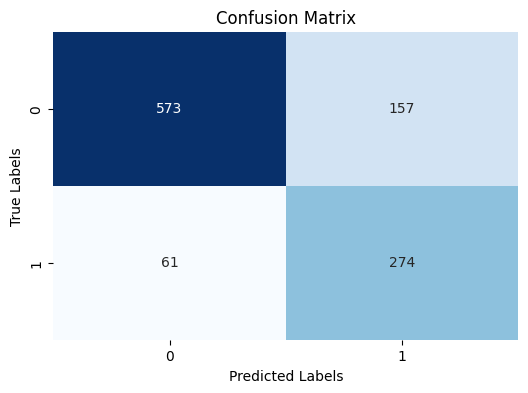


Class-wise Accuracy:
Class 0: 573/730 (78.49%)
Class 1: 274/335 (81.79%)

Precision-Recall Curve:


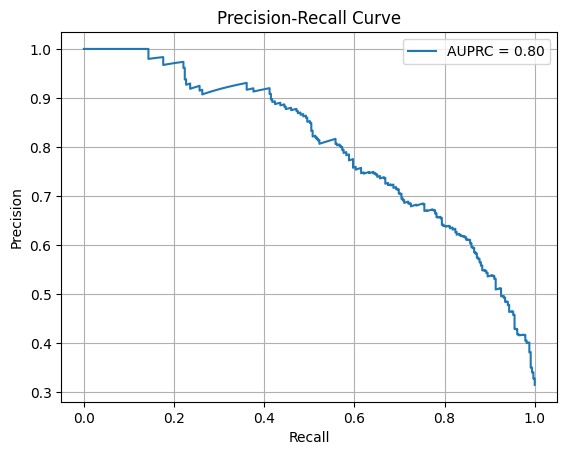


ROC Curve:


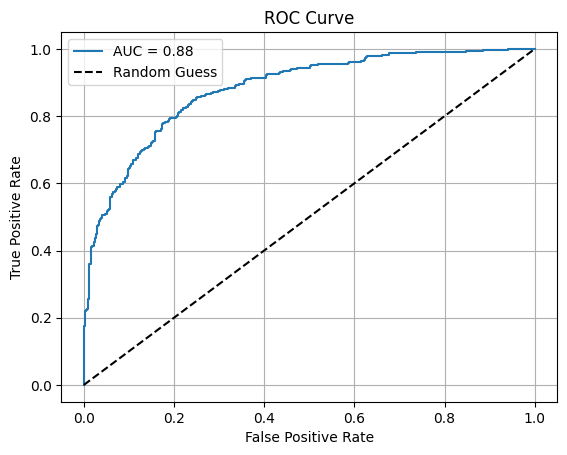


Mean F1 Score: 0.7778
Balanced Accuracy: 0.8014
Average AUPRC: 0.7995

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       730
           1       0.64      0.82      0.72       335

    accuracy                           0.80      1065
   macro avg       0.77      0.80      0.78      1065
weighted avg       0.82      0.80      0.80      1065

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 5
Epoch [1/100], Loss: 0.7065, Accuracy: 0.5048
Validation Loss: 0.6549, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6849, Accuracy: 0.5416
Validation Loss: 0.7232, Validation Accuracy: 0.5018
Epoch [3/100], Loss: 0.6300, Accuracy: 0.7071
Validation Loss: 0.6926, Validation Accuracy: 0.7283
Epoch [4/100], Loss: 0.5991, Accuracy: 0.7820
Validation Loss: 0.6383, Validation Accuracy: 0.7580
Epoch [5/100], Los

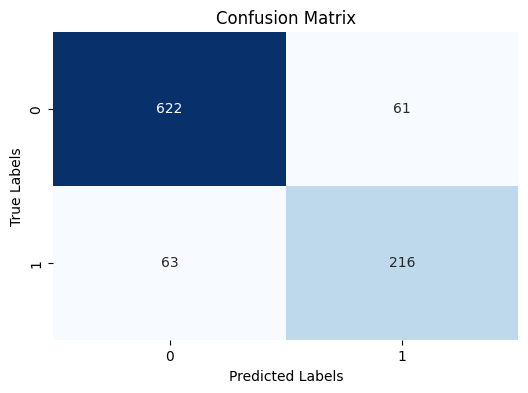


Class-wise Accuracy:
Class 0: 622/683 (91.07%)
Class 1: 216/279 (77.42%)

Precision-Recall Curve:


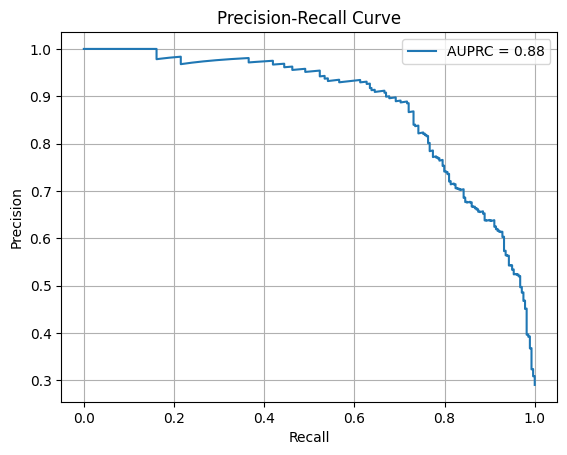


ROC Curve:


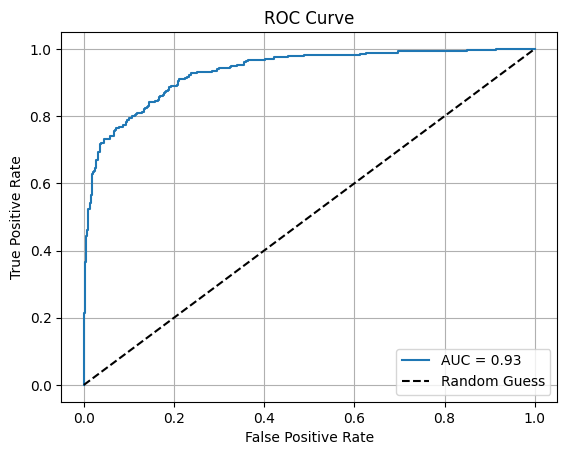


Mean F1 Score: 0.8432
Balanced Accuracy: 0.8424
Average AUPRC: 0.8792

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       683
           1       0.78      0.77      0.78       279

    accuracy                           0.87       962
   macro avg       0.84      0.84      0.84       962
weighted avg       0.87      0.87      0.87       962

Accuracy for each fold: [np.float64(0.764360683125555), np.float64(0.7995430910881169), np.float64(0.7450345134311305), np.float64(0.7941423021876917), np.float64(0.8462717192231196), np.float64(0.8036158960291548), np.float64(0.7978645914307266), np.float64(0.7881934777027687), np.float64(0.8014209773052545), np.float64(0.8424408444717328)]
AUPRC for each fold: [np.float64(0.6716991719215247), np.float64(0.7850042367785199), np.float64(0.7584752271496277), np.float64(0.8239442238988377), np.float64(0.8686049076359007), np.float64(0.8121941909486103), np.float64(0.8213266

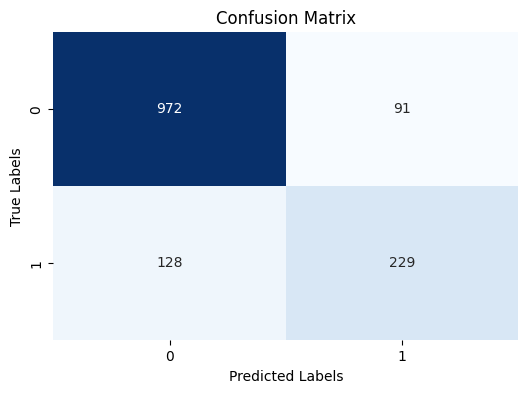


Class-wise Accuracy:
Class 0: 972/1063 (91.44%)
Class 1: 229/357 (64.15%)

Precision-Recall Curve:


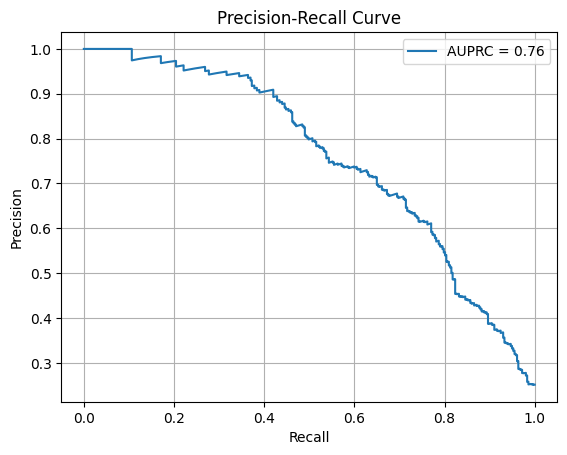


ROC Curve:


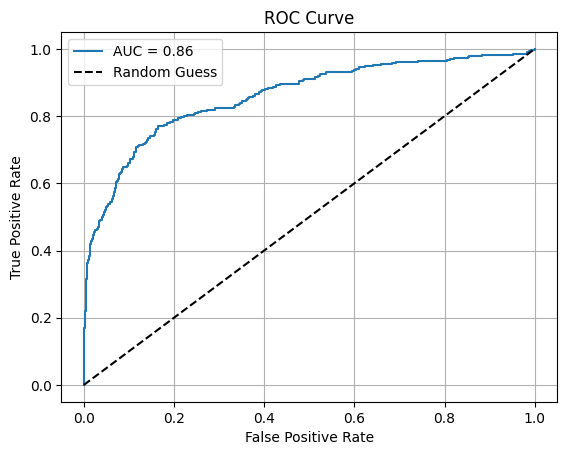


Mean F1 Score: 0.7876
Balanced Accuracy: 0.7779
Average AUPRC: 0.7579

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1063
           1       0.72      0.64      0.68       357

    accuracy                           0.85      1420
   macro avg       0.80      0.78      0.79      1420
weighted avg       0.84      0.85      0.84      1420

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 2
Epoch [1/100], Loss: 0.6405, Accuracy: 0.6686
Validation Loss: 0.5900, Validation Accuracy: 0.7866
Epoch [2/100], Loss: 0.5802, Accuracy: 0.7919
Validation Loss: 0.5500, Validation Accuracy: 0.7965
Epoch [3/100], Loss: 0.5536, Accuracy: 0.8392
Validation Loss: 0.6402, Validation Accuracy: 0.7860
Epoch [4/100], Loss: 0.5567, Accuracy: 0.8299
Validation Loss: 0.5760, Validation Accuracy: 0.8055
Epoch [5/100], Los

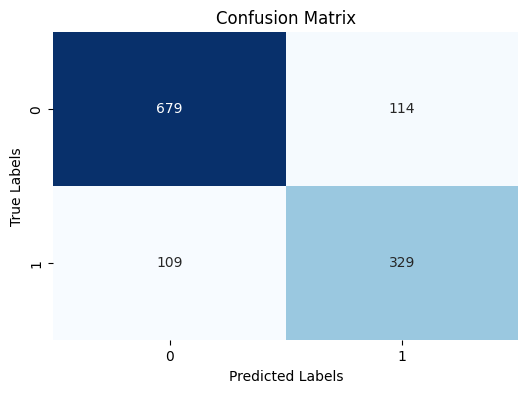


Class-wise Accuracy:
Class 0: 679/793 (85.62%)
Class 1: 329/438 (75.11%)

Precision-Recall Curve:


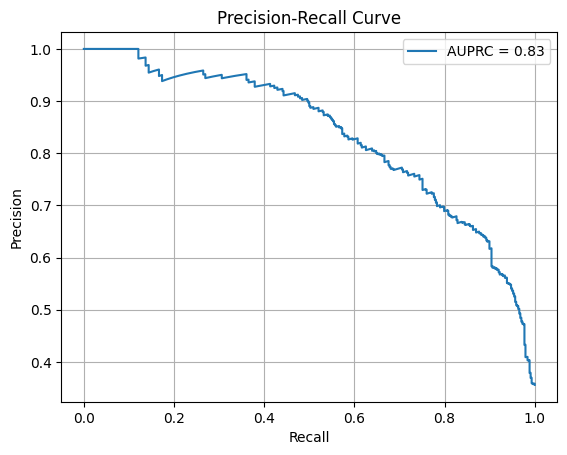


ROC Curve:


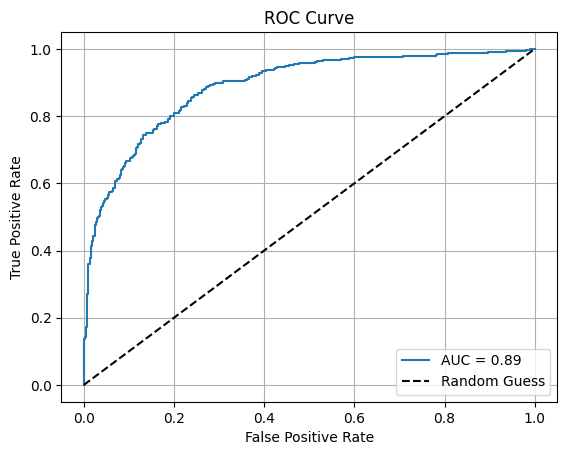


Mean F1 Score: 0.8029
Balanced Accuracy: 0.8037
Average AUPRC: 0.8344

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       793
           1       0.74      0.75      0.75       438

    accuracy                           0.82      1231
   macro avg       0.80      0.80      0.80      1231
weighted avg       0.82      0.82      0.82      1231

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 3
Epoch [1/100], Loss: 0.6555, Accuracy: 0.6643
Validation Loss: 0.5979, Validation Accuracy: 0.7939
Epoch [2/100], Loss: 0.5673, Accuracy: 0.8203
Validation Loss: 0.5740, Validation Accuracy: 0.8037
Epoch [3/100], Loss: 0.5528, Accuracy: 0.8455
Validation Loss: 0.6206, Validation Accuracy: 0.7815
Epoch [4/100], Loss: 0.5468, Accuracy: 0.8491
Validation Loss: 0.5678, Validation Accuracy: 0.7805
Epoch [5/100], Los

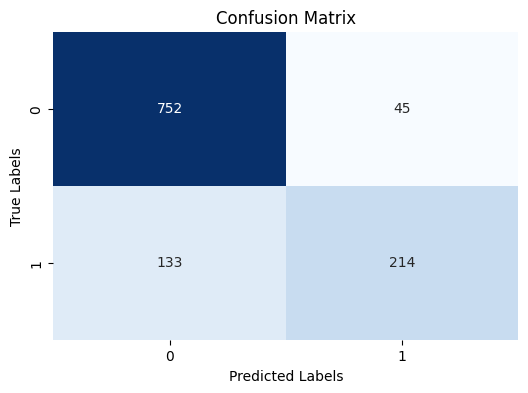


Class-wise Accuracy:
Class 0: 752/797 (94.35%)
Class 1: 214/347 (61.67%)

Precision-Recall Curve:


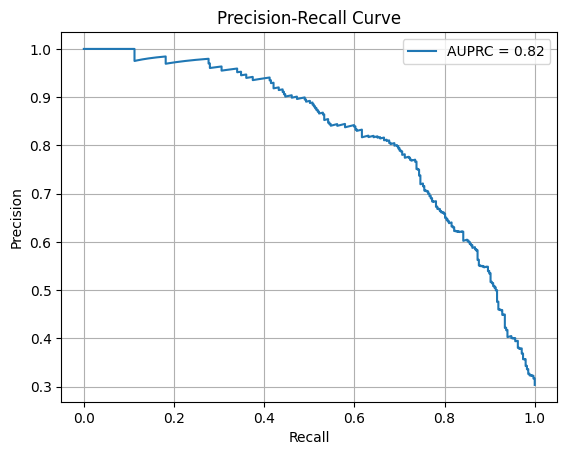


ROC Curve:


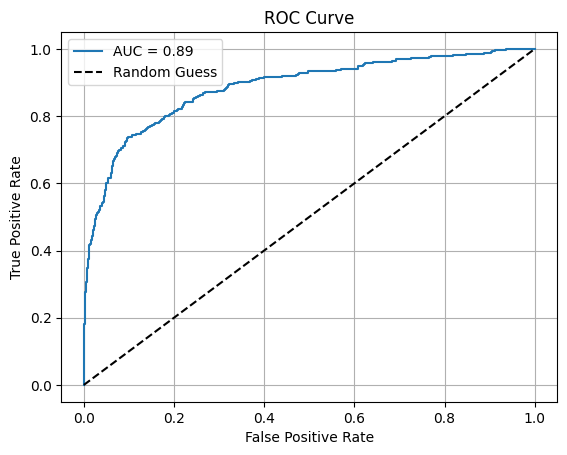


Mean F1 Score: 0.8002
Balanced Accuracy: 0.7801
Average AUPRC: 0.8217

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       797
           1       0.83      0.62      0.71       347

    accuracy                           0.84      1144
   macro avg       0.84      0.78      0.80      1144
weighted avg       0.84      0.84      0.84      1144

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 4
Epoch [1/100], Loss: 0.6350, Accuracy: 0.6909
Validation Loss: 0.6230, Validation Accuracy: 0.7573
Epoch [2/100], Loss: 0.5695, Accuracy: 0.8124
Validation Loss: 0.6015, Validation Accuracy: 0.7728
Epoch [3/100], Loss: 0.5562, Accuracy: 0.8329
Validation Loss: 0.5896, Validation Accuracy: 0.7949
Epoch [4/100], Loss: 0.5532, Accuracy: 0.8282
Validation Loss: 0.5861, Validation Accuracy: 0.7961
Epoch [5/100], Los

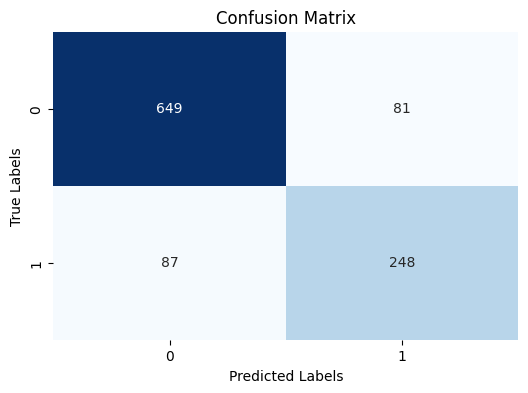


Class-wise Accuracy:
Class 0: 649/730 (88.90%)
Class 1: 248/335 (74.03%)

Precision-Recall Curve:


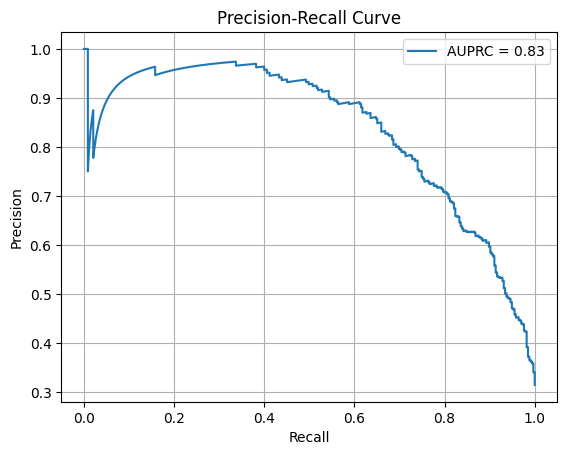


ROC Curve:


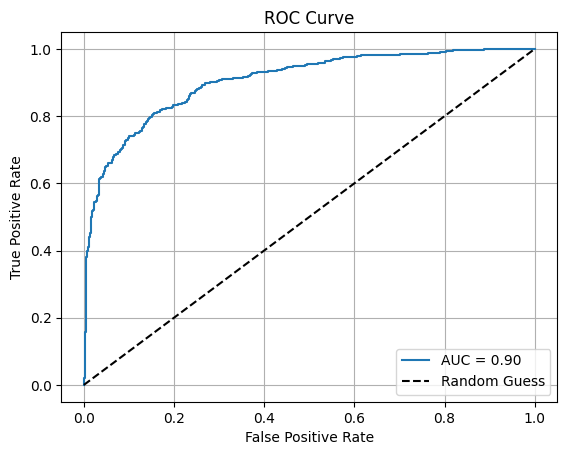


Mean F1 Score: 0.8162
Balanced Accuracy: 0.8147
Average AUPRC: 0.8344

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       730
           1       0.75      0.74      0.75       335

    accuracy                           0.84      1065
   macro avg       0.82      0.81      0.82      1065
weighted avg       0.84      0.84      0.84      1065

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 5
Epoch [1/100], Loss: 0.6594, Accuracy: 0.6493
Validation Loss: 0.6367, Validation Accuracy: 0.7843
Epoch [2/100], Loss: 0.5854, Accuracy: 0.7938
Validation Loss: 0.5561, Validation Accuracy: 0.7918
Epoch [3/100], Loss: 0.5711, Accuracy: 0.8205
Validation Loss: 0.5656, Validation Accuracy: 0.7983
Epoch [4/100], Loss: 0.5592, Accuracy: 0.8367
Validation Loss: 0.5887, Validation Accuracy: 0.7877
Epoch [5/100], Los

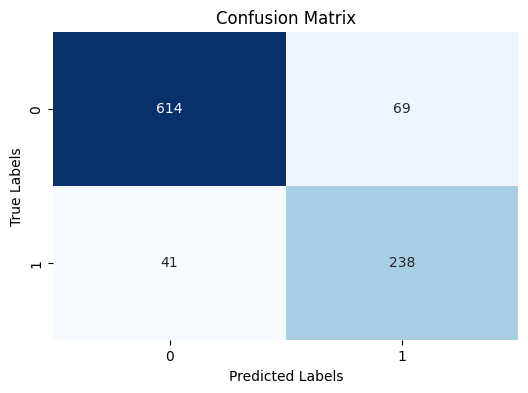


Class-wise Accuracy:
Class 0: 614/683 (89.90%)
Class 1: 238/279 (85.30%)

Precision-Recall Curve:


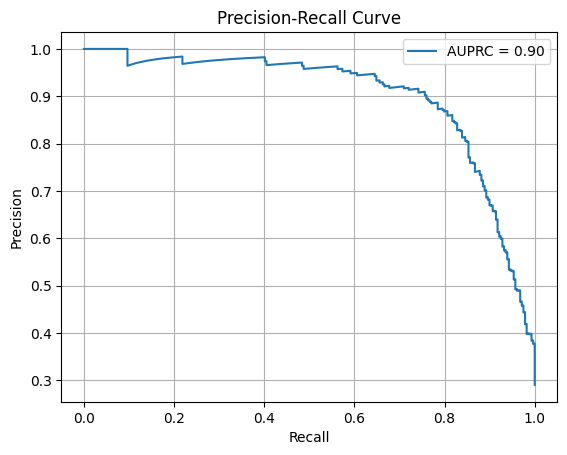


ROC Curve:


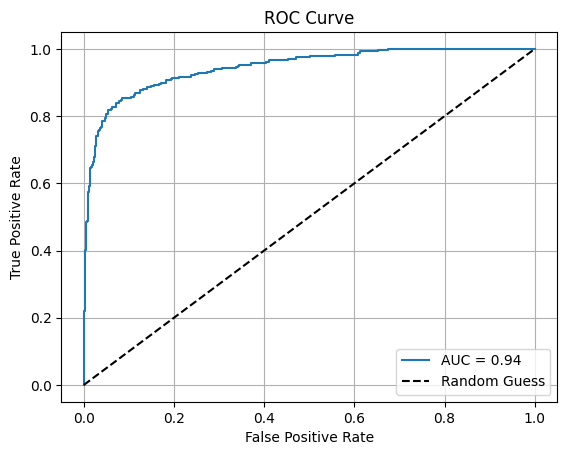


Mean F1 Score: 0.8650
Balanced Accuracy: 0.8760
Average AUPRC: 0.9003

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       683
           1       0.78      0.85      0.81       279

    accuracy                           0.89       962
   macro avg       0.86      0.88      0.87       962
weighted avg       0.89      0.89      0.89       962

Accuracy for each fold: [np.float64(0.764360683125555), np.float64(0.7995430910881169), np.float64(0.7450345134311305), np.float64(0.7941423021876917), np.float64(0.8462717192231196), np.float64(0.8036158960291548), np.float64(0.7978645914307266), np.float64(0.7881934777027687), np.float64(0.8014209773052545), np.float64(0.8424408444717328), np.float64(0.7779249046749461), np.float64(0.8036918355243081), np.float64(0.7801264829566206), np.float64(0.8146698016765488), np.float64(0.876010852395871)]
AUPRC for each fold: [np.float64(0.6716991719215247), np.float64(0.78500423

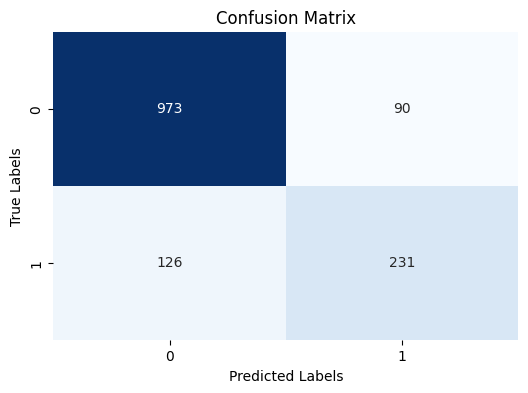


Class-wise Accuracy:
Class 0: 973/1063 (91.53%)
Class 1: 231/357 (64.71%)

Precision-Recall Curve:


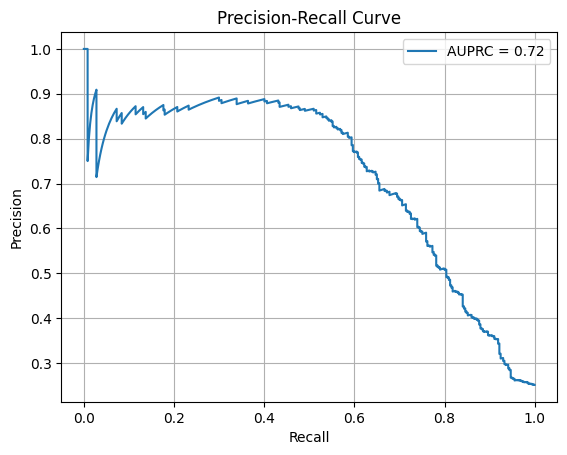


ROC Curve:


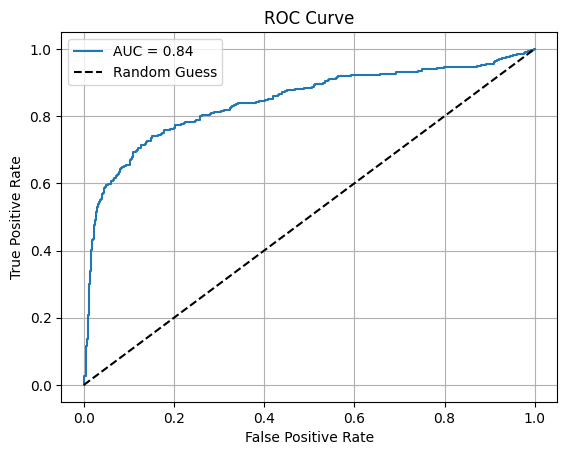


Mean F1 Score: 0.7908
Balanced Accuracy: 0.7812
Average AUPRC: 0.7185

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1063
           1       0.72      0.65      0.68       357

    accuracy                           0.85      1420
   macro avg       0.80      0.78      0.79      1420
weighted avg       0.84      0.85      0.85      1420

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 2
Epoch [1/100], Loss: 0.6091, Accuracy: 0.7336
Validation Loss: 0.6173, Validation Accuracy: 0.7999
Epoch [2/100], Loss: 0.5714, Accuracy: 0.8023
Validation Loss: 0.5424, Validation Accuracy: 0.8124
Epoch [3/100], Loss: 0.5504, Accuracy: 0.8330
Validation Loss: 0.6187, Validation Accuracy: 0.7874
Epoch [4/100], Loss: 0.5403, Accuracy: 0.8590
Validation Loss: 0.5683, Validation Accuracy: 0.8047
Epoch [5/100], Los

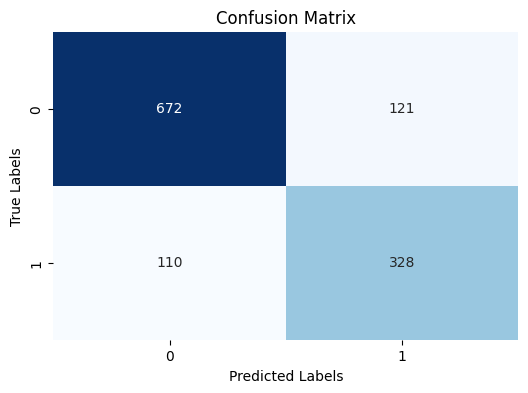


Class-wise Accuracy:
Class 0: 672/793 (84.74%)
Class 1: 328/438 (74.89%)

Precision-Recall Curve:


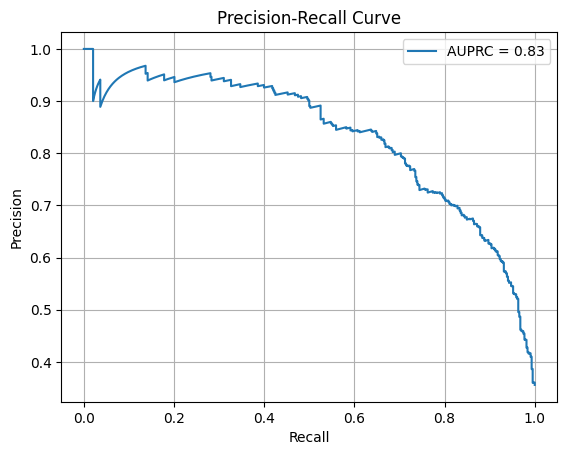


ROC Curve:


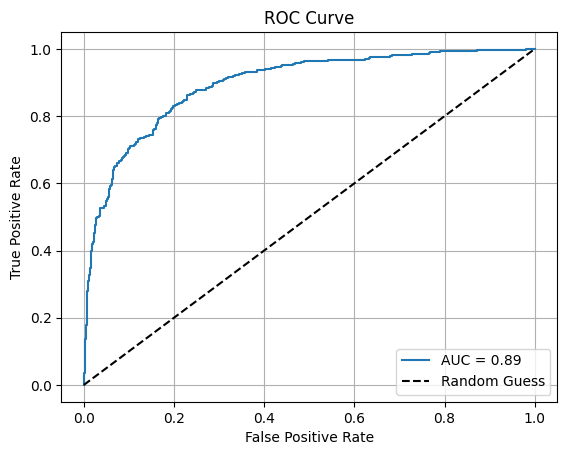


Mean F1 Score: 0.7965
Balanced Accuracy: 0.7981
Average AUPRC: 0.8325

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       793
           1       0.73      0.75      0.74       438

    accuracy                           0.81      1231
   macro avg       0.79      0.80      0.80      1231
weighted avg       0.81      0.81      0.81      1231

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 3
Epoch [1/100], Loss: 0.5999, Accuracy: 0.7559
Validation Loss: 0.6068, Validation Accuracy: 0.7484
Epoch [2/100], Loss: 0.5719, Accuracy: 0.8059
Validation Loss: 0.5925, Validation Accuracy: 0.7796
Epoch [3/100], Loss: 0.5488, Accuracy: 0.8450
Validation Loss: 0.5695, Validation Accuracy: 0.7714
Epoch [4/100], Loss: 0.5336, Accuracy: 0.8651
Validation Loss: 0.5842, Validation Accuracy: 0.8009
Epoch [5/100], Los

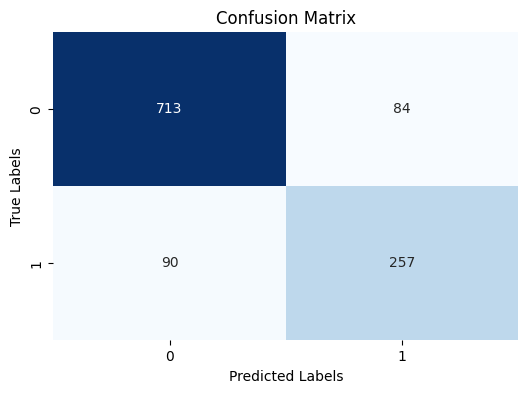


Class-wise Accuracy:
Class 0: 713/797 (89.46%)
Class 1: 257/347 (74.06%)

Precision-Recall Curve:


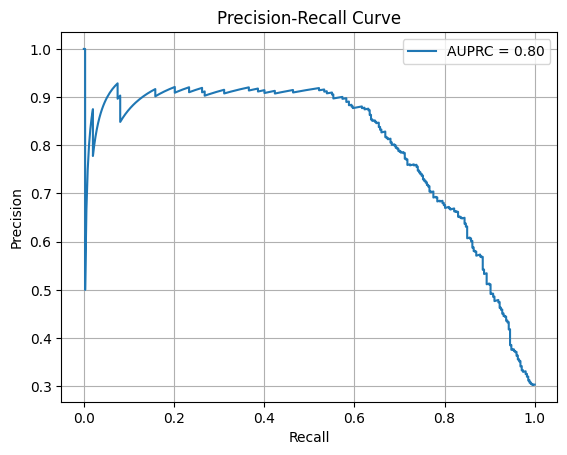


ROC Curve:


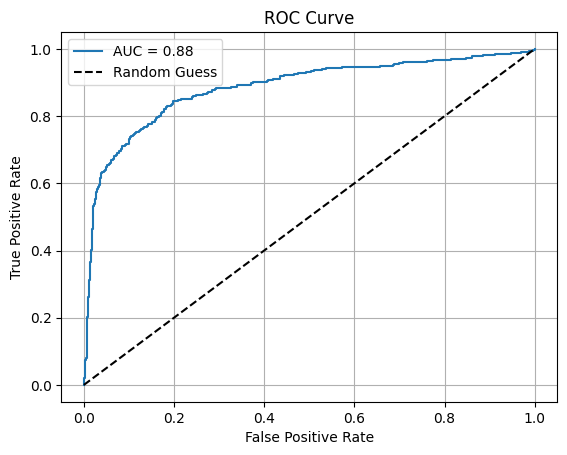


Mean F1 Score: 0.8192
Balanced Accuracy: 0.8176
Average AUPRC: 0.7992

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       797
           1       0.75      0.74      0.75       347

    accuracy                           0.85      1144
   macro avg       0.82      0.82      0.82      1144
weighted avg       0.85      0.85      0.85      1144

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 4
Epoch [1/100], Loss: 0.6128, Accuracy: 0.7356
Validation Loss: 0.5653, Validation Accuracy: 0.7665
Epoch [2/100], Loss: 0.5624, Accuracy: 0.8175
Validation Loss: 0.5638, Validation Accuracy: 0.7825
Epoch [3/100], Loss: 0.5480, Accuracy: 0.8417
Validation Loss: 0.5882, Validation Accuracy: 0.7918
Epoch [4/100], Loss: 0.5417, Accuracy: 0.8543
Validation Loss: 0.5839, Validation Accuracy: 0.8060
Epoch [5/100], Los

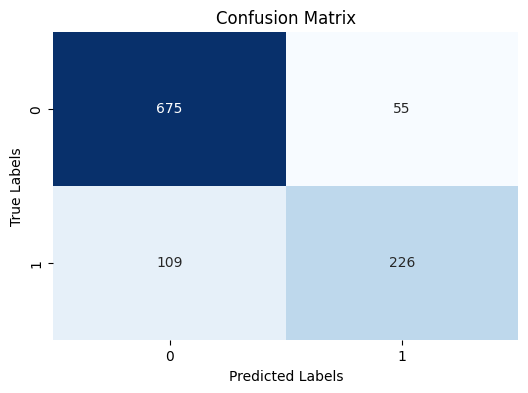


Class-wise Accuracy:
Class 0: 675/730 (92.47%)
Class 1: 226/335 (67.46%)

Precision-Recall Curve:


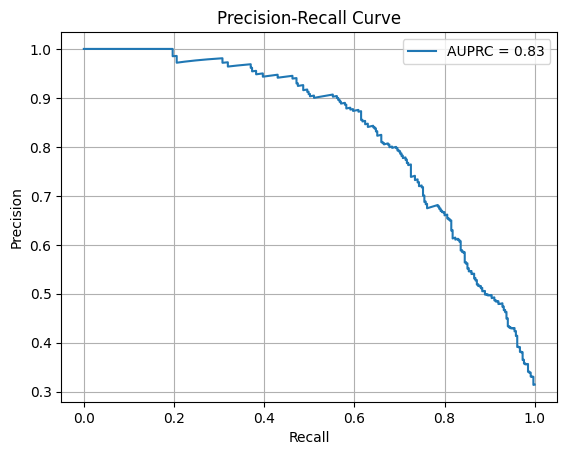


ROC Curve:


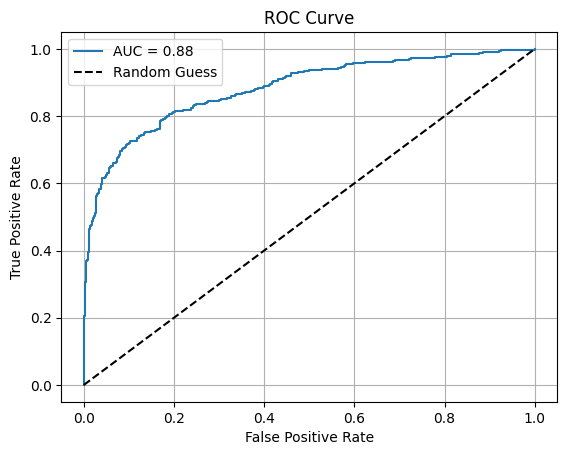


Mean F1 Score: 0.8127
Balanced Accuracy: 0.7996
Average AUPRC: 0.8311

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       730
           1       0.80      0.67      0.73       335

    accuracy                           0.85      1065
   macro avg       0.83      0.80      0.81      1065
weighted avg       0.84      0.85      0.84      1065

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 5
Epoch [1/100], Loss: 0.6294, Accuracy: 0.7062
Validation Loss: 0.5648, Validation Accuracy: 0.8193
Epoch [2/100], Loss: 0.5804, Accuracy: 0.7925
Validation Loss: 0.5827, Validation Accuracy: 0.7959
Epoch [3/100], Loss: 0.5624, Accuracy: 0.8205
Validation Loss: 0.6026, Validation Accuracy: 0.7773
Epoch [4/100], Loss: 0.5470, Accuracy: 0.8380
Validation Loss: 0.5761, Validation Accuracy: 0.8097
Epoch [5/100], Los

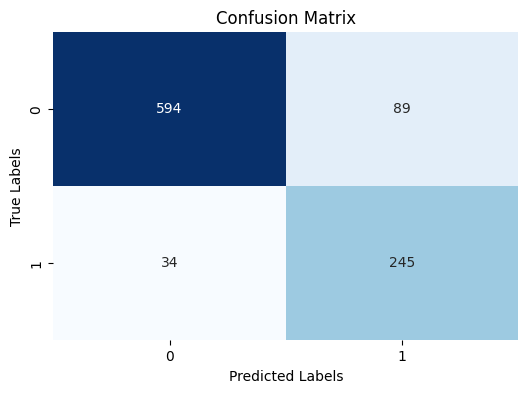


Class-wise Accuracy:
Class 0: 594/683 (86.97%)
Class 1: 245/279 (87.81%)

Precision-Recall Curve:


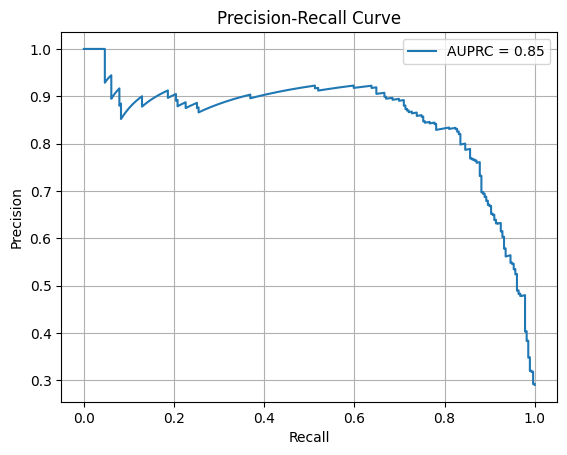


ROC Curve:


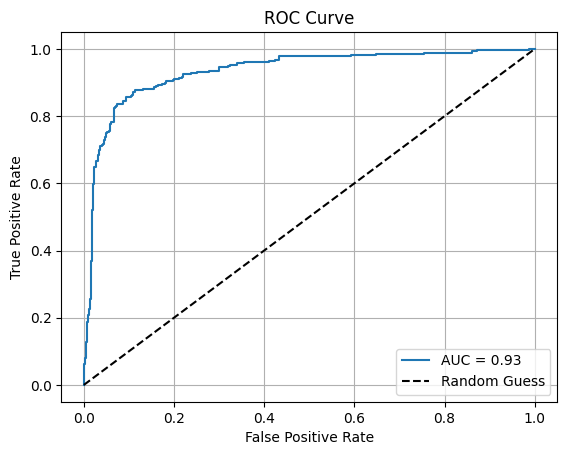


Mean F1 Score: 0.8528
Balanced Accuracy: 0.8739
Average AUPRC: 0.8511

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       683
           1       0.73      0.88      0.80       279

    accuracy                           0.87       962
   macro avg       0.84      0.87      0.85       962
weighted avg       0.88      0.87      0.88       962

Accuracy for each fold: [np.float64(0.764360683125555), np.float64(0.7995430910881169), np.float64(0.7450345134311305), np.float64(0.7941423021876917), np.float64(0.8462717192231196), np.float64(0.8036158960291548), np.float64(0.7978645914307266), np.float64(0.7881934777027687), np.float64(0.8014209773052545), np.float64(0.8424408444717328), np.float64(0.7779249046749461), np.float64(0.8036918355243081), np.float64(0.7801264829566206), np.float64(0.8146698016765488), np.float64(0.876010852395871), np.float64(0.7811963920092967), np.float64(0.798136663845175), np.float64(0

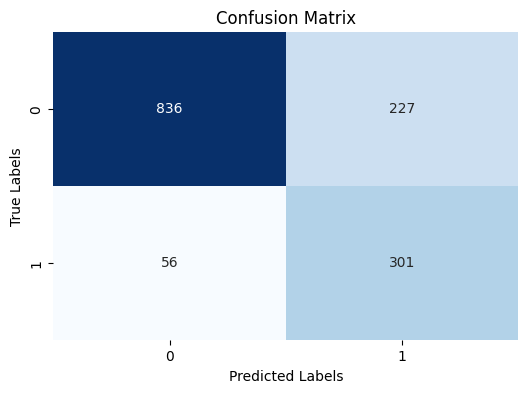


Class-wise Accuracy:
Class 0: 836/1063 (78.65%)
Class 1: 301/357 (84.31%)

Precision-Recall Curve:


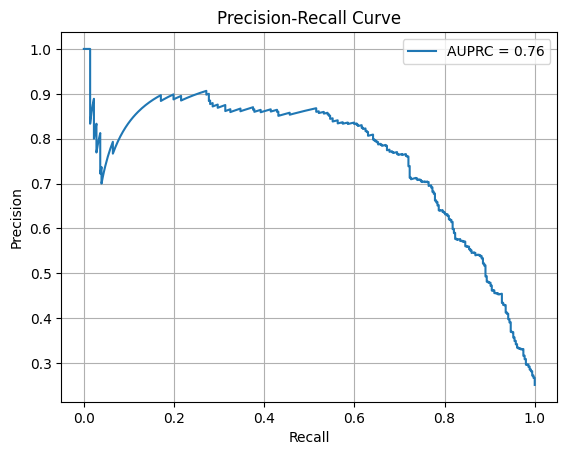


ROC Curve:


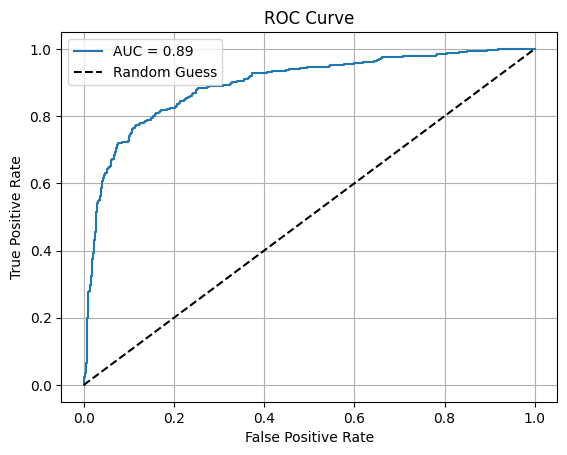


Mean F1 Score: 0.7677
Balanced Accuracy: 0.8148
Average AUPRC: 0.7601

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1063
           1       0.57      0.84      0.68       357

    accuracy                           0.80      1420
   macro avg       0.75      0.81      0.77      1420
weighted avg       0.84      0.80      0.81      1420

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 2
Epoch [1/100], Loss: 0.6661, Accuracy: 0.6264
Validation Loss: 0.5817, Validation Accuracy: 0.7819
Epoch [2/100], Loss: 0.5822, Accuracy: 0.7950
Validation Loss: 0.5665, Validation Accuracy: 0.8210
Epoch [3/100], Loss: 0.5631, Accuracy: 0.8236
Validation Loss: 0.5642, Validation Accuracy: 0.8164
Epoch [4/100], Loss: 0.5555, Accuracy: 0.8299
Validation Loss: 0.5793, Validation Accuracy: 0.8097
Epoch [5/100], Los

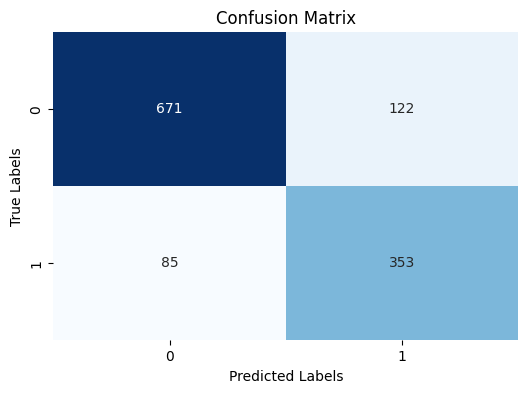


Class-wise Accuracy:
Class 0: 671/793 (84.62%)
Class 1: 353/438 (80.59%)

Precision-Recall Curve:


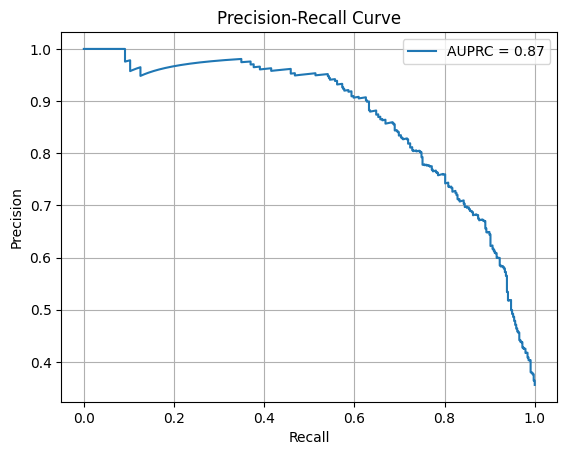


ROC Curve:


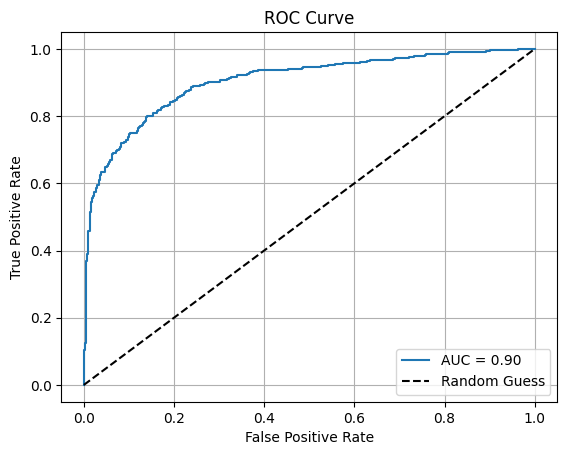


Mean F1 Score: 0.8198
Balanced Accuracy: 0.8260
Average AUPRC: 0.8673

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       793
           1       0.74      0.81      0.77       438

    accuracy                           0.83      1231
   macro avg       0.82      0.83      0.82      1231
weighted avg       0.84      0.83      0.83      1231

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 3
Epoch [1/100], Loss: 0.6438, Accuracy: 0.6684
Validation Loss: 0.6211, Validation Accuracy: 0.7316
Epoch [2/100], Loss: 0.5722, Accuracy: 0.8141
Validation Loss: 0.6160, Validation Accuracy: 0.7714
Epoch [3/100], Loss: 0.5607, Accuracy: 0.8234
Validation Loss: 0.6061, Validation Accuracy: 0.7821
Epoch [4/100], Loss: 0.5604, Accuracy: 0.8265
Validation Loss: 0.5627, Validation Accuracy: 0.7952
Epoch [5/100], Los

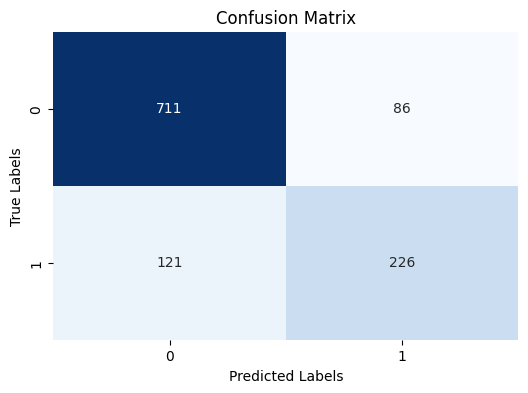


Class-wise Accuracy:
Class 0: 711/797 (89.21%)
Class 1: 226/347 (65.13%)

Precision-Recall Curve:


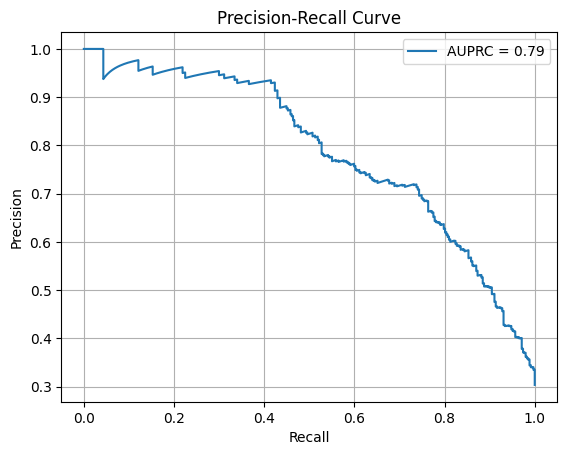


ROC Curve:


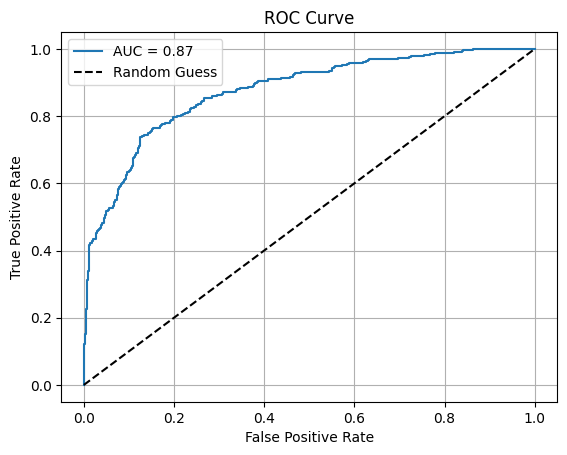


Mean F1 Score: 0.7794
Balanced Accuracy: 0.7717
Average AUPRC: 0.7882

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       797
           1       0.72      0.65      0.69       347

    accuracy                           0.82      1144
   macro avg       0.79      0.77      0.78      1144
weighted avg       0.82      0.82      0.82      1144

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 4
Epoch [1/100], Loss: 0.6422, Accuracy: 0.6685
Validation Loss: 0.5669, Validation Accuracy: 0.7657
Epoch [2/100], Loss: 0.5734, Accuracy: 0.8040
Validation Loss: 0.5577, Validation Accuracy: 0.7847
Epoch [3/100], Loss: 0.5599, Accuracy: 0.8310
Validation Loss: 0.5865, Validation Accuracy: 0.7751
Epoch [4/100], Loss: 0.5546, Accuracy: 0.8338
Validation Loss: 0.5830, Validation Accuracy: 0.7794
Epoch [5/100], Los

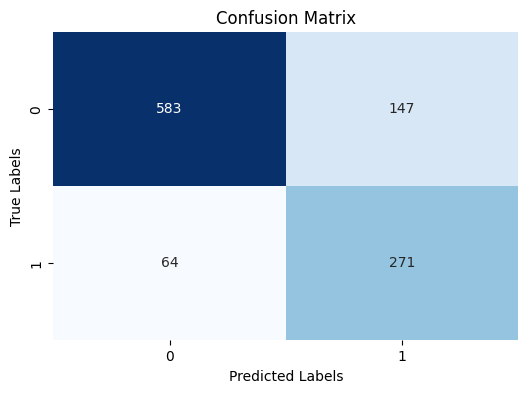


Class-wise Accuracy:
Class 0: 583/730 (79.86%)
Class 1: 271/335 (80.90%)

Precision-Recall Curve:


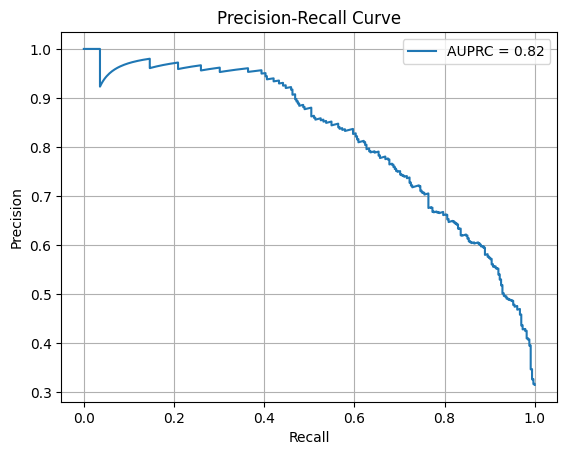


ROC Curve:


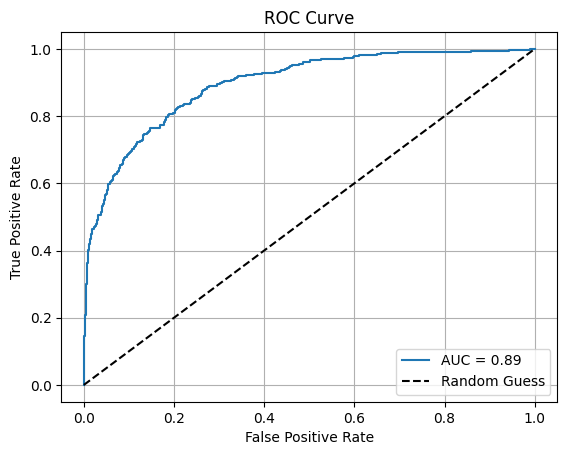


Mean F1 Score: 0.7833
Balanced Accuracy: 0.8038
Average AUPRC: 0.8208

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       730
           1       0.65      0.81      0.72       335

    accuracy                           0.80      1065
   macro avg       0.77      0.80      0.78      1065
weighted avg       0.82      0.80      0.81      1065

__________________________________________________
__________________________________________________
__________________________________________________
Fold No: 5
Epoch [1/100], Loss: 0.6955, Accuracy: 0.5355
Validation Loss: 0.7050, Validation Accuracy: 0.7099
Epoch [2/100], Loss: 0.5920, Accuracy: 0.7859
Validation Loss: 0.6111, Validation Accuracy: 0.6931
Epoch [3/100], Loss: 0.5782, Accuracy: 0.8017
Validation Loss: 0.5899, Validation Accuracy: 0.7761
Epoch [4/100], Loss: 0.5595, Accuracy: 0.8249
Validation Loss: 0.5819, Validation Accuracy: 0.8016
Epoch [5/100], Los

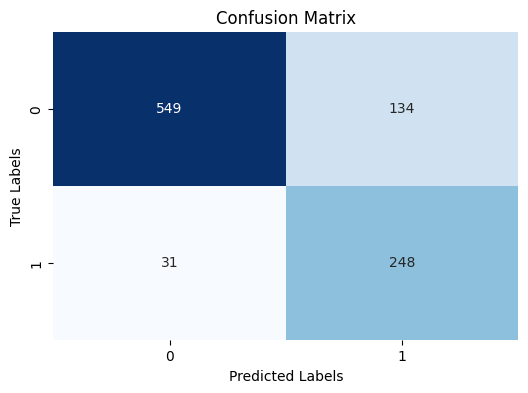


Class-wise Accuracy:
Class 0: 549/683 (80.38%)
Class 1: 248/279 (88.89%)

Precision-Recall Curve:


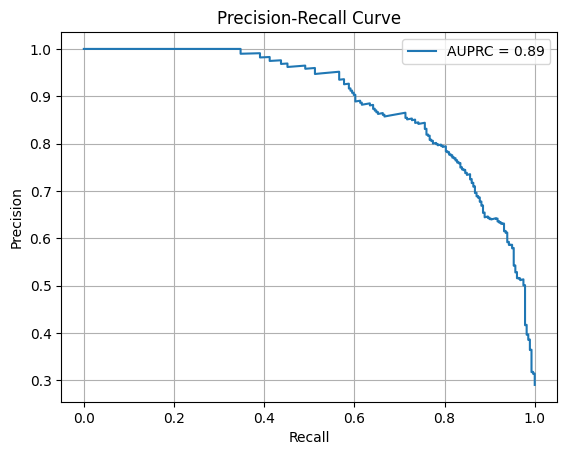


ROC Curve:


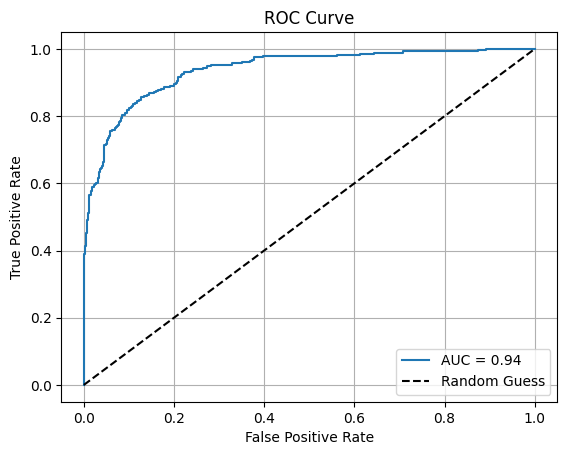


Mean F1 Score: 0.8099
Balanced Accuracy: 0.8463
Average AUPRC: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       683
           1       0.65      0.89      0.75       279

    accuracy                           0.83       962
   macro avg       0.80      0.85      0.81       962
weighted avg       0.86      0.83      0.83       962

Accuracy for each fold: [np.float64(0.764360683125555), np.float64(0.7995430910881169), np.float64(0.7450345134311305), np.float64(0.7941423021876917), np.float64(0.8462717192231196), np.float64(0.8036158960291548), np.float64(0.7978645914307266), np.float64(0.7881934777027687), np.float64(0.8014209773052545), np.float64(0.8424408444717328), np.float64(0.7779249046749461), np.float64(0.8036918355243081), np.float64(0.7801264829566206), np.float64(0.8146698016765488), np.float64(0.876010852395871), np.float64(0.7811963920092967), np.float64(0.798136663845175), np.float64(0

In [13]:

import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc


# Fold indices and other configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)

test_folds_chosen = []
val_folds_chosen = []
fold_confusion_matrices = []  # To store confusion matrices for each fold
fold_accuracies = []  # To store balanced accuracy for each fold
fold_auprcs = []  # To store AUPRC for each fold

# Model and training configurations
num_classes = 2
epochs = 100
input_shape = (3,224,224)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


torch.random.manual_seed(42)  # For reproducibility
np.random.seed(42)  # For reproducibility

all_params = [
    {"num_heads": 32, "num_transformer_blocks": 8, "learning_rate": 0.0014268683384269449, "weight_decay": 0.0003463319958859285, "label_smoothing": 0.18},
{"num_heads": 16, "num_transformer_blocks": 8, "learning_rate": 0.0013696721515052846, "weight_decay": 0.0009676440016847239, "label_smoothing": 0.04},
{"num_heads": 32, "num_transformer_blocks": 8, "learning_rate": 0.0005740396891375217, "weight_decay": 0.0007863640188002474, "label_smoothing": 0.23},
{"num_heads": 8, "num_transformer_blocks": 8, "learning_rate": 0.0002850701467255021, "weight_decay": 0.0009773517427519572, "label_smoothing": 0.1},
{"num_heads": 2, "num_transformer_blocks": 8, "learning_rate": 0.0008196533938204881, "weight_decay": 0.0009674378890685176, "label_smoothing": 0.16},

]

p_indx = 1

for params in all_params:
    
    print("_"*50)
    print("_"*50)
    print("_"*50)
    print("params set:",p_indx)
    print("_"*50)
    print("_"*50)
    print("_"*50)
    
    num_heads = params["num_heads"]
    num_transformer_blocks = params["num_transformer_blocks"]
    learning_rate = params["learning_rate"]
    optimizer_name = "Adam"
    weight_decay = params["weight_decay"]
    batch_size = 10
    label_smoothing = params["label_smoothing"]

    print(f"Running with params: {params}")
    
    def save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_info, csv_path=r"G:\CODING\py\newnotebooks\results.csv"):
        """
        Save all results from the current experiment to a CSV file
        
        Parameters:
        - fold_accuracies: list of balanced accuracy scores for each fold
        - fold_auprcs: list of AUPRC scores for each fold
        - fold_confusion_matrices: list of confusion matrices for each fold
        - model_info: string with model architecture description
        - csv_path: path to the CSV file to save results
        """
        # Current time for experiment identification
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        # Prepare data for the DataFrame
        data = {
            "timestamp": timestamp,
            "model_info": model_info,
            "num_classes": num_classes,
            "learning_rate": learning_rate,
            "epochs": epochs,
            "mean_balanced_accuracy": np.mean(fold_accuracies),
            "std_balanced_accuracy": np.std(fold_accuracies),
            "mean_auprc": np.mean(fold_auprcs),
            "std_auprc": np.std(fold_auprcs),
        }
        
        # Add individual fold results
        for i, (acc, auprc) in enumerate(zip(fold_accuracies, fold_auprcs)):
            data[f"fold_{i+1}_accuracy"] = acc
            data[f"fold_{i+1}_auprc"] = auprc
        
        # Add confusion matrix info
        for i, cm in enumerate(fold_confusion_matrices):
            data[f"fold_{i+1}_confusion_matrix"] = str(cm)
        
        # Create DataFrame and append to CSV
        df = pd.DataFrame([data])
        
        # Check if file exists
        file_exists = os.path.isfile(csv_path)
        
        # Save to CSV
        if file_exists:
            df.to_csv(csv_path, mode='a', header=False, index=False)
        else:
            df.to_csv(csv_path, mode='w', header=True, index=False)

        print(f"Results saved to {csv_path}") 

    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print("_"*50)
        print("_"*50)
        print("_"*50)
        
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = TRANS_CNN(input_shape=input_shape,num_classes=num_classes,embed_dim=128,num_heads=num_heads,num_transformer_blocks=num_transformer_blocks) # Initialize your model here
        fold_model.to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate,weight_decay=weight_decay)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        test_labels_binarized = test_labels_list
        test_auprcs = []

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Final metrics across all folds
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    print(f'Accuracy for each fold: {fold_accuracies}')
    print(f'AUPRC for each fold: {fold_auprcs}')
    print(f'Average AUPRC across all folds: {average_auprc}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy}')
        
    # Save all results to CSV
    model_description = f"TRANS_CNN {p_indx} MANUAL APPROACH 2 CLASS"
    save_results_to_csv(fold_accuracies, fold_auprcs, fold_confusion_matrices, model_description,csv_path=r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\newnotebooks\results.csv")
    p_indx += 1


In [ ]:
#clear gpu and restart kernel
torch.cuda.empty_cache()
#restart kernel
import gc
gc.collect()
# Restart the kernel to clear memory
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)  # This will restart the kernel